PART 1: Wrangling
===============

Import the necessary python packages.

In [2596]:
from bs4 import BeautifulSoup as bs
import requests as reqs
import numpy as np
from urllib.parse import urlparse
import pandas as pd
import datetime, re
import matplotlib.pyplot as plt

Pull the required URL, in this case I used the clone.

In [2406]:
# Requests the inputed URL
page = reqs.get('https://cmsc320.github.io/files/top-50-solar-flares.html')

## Step 1:
### Scrape your competitor's data

Pass the imported webpage into pandas, automatically extracting the desired DataFrame.

In [2407]:
# Creating the DataFrame using read_html on the entire html page.
bear = pd.read_html(page.text)
bear[0].head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Region,Start,Maximum,End,Unnamed: 7
0,1,X28+,2003/11/04,486,19:29,19:53,20:06,MovieView archive
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24,MovieView archive
3,4,X17+,2005/09/07,808,17:17,17:40,18:03,MovieView archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive
5,6,X10,2003/10/29,486,20:37,20:49,21:01,MovieView archive
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,MovieView archive
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,MovieView archive
8,9,X9,2006/12/05,930,10:18,10:35,10:45,MovieView archive
9,10,X8.3,2003/11/02,486,17:03,17:25,17:39,MovieView archive


Some minor formatting, renaming the columns and adjusting the index. This gives us the desired table as seen in Part 1, Step 1 on the project github.

In [2408]:
solar = bear[0]
# Naming the columns to something appropriate
solar.columns = ['Rank', 'X Class', 'Date', 'Region', 'Start Time', 'Peak', 'End Time', 'Movies']
# Adjusting index
solar.index += 1
solar.head(10)

,Rank,X Class,Date,Region,Start Time,Peak,End Time,Movies
1,1,X28+,2003/11/04,486,19:29,19:53,20:06,MovieView archive
2,2,X20+,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
3,3,X17.2+,2003/10/28,486,09:51,11:10,11:24,MovieView archive
4,4,X17+,2005/09/07,808,17:17,17:40,18:03,MovieView archive
5,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive
6,6,X10,2003/10/29,486,20:37,20:49,21:01,MovieView archive
7,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,MovieView archive
8,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,MovieView archive
9,9,X9,2006/12/05,930,10:18,10:35,10:45,MovieView archive
10,10,X8.3,2003/11/02,486,17:03,17:25,17:39,MovieView archive


## Step 2:
### Tidy the top 50 solar flare data

Delete the last column as it will not be used. 

In [2409]:
# Dropping last column
solar = solar.drop('Movies', axis=1)
solar.head(10)

,Rank,X Class,Date,Region,Start Time,Peak,End Time
1,1,X28+,2003/11/04,486,19:29,19:53,20:06
2,2,X20+,2001/04/02,9393,21:32,21:51,22:03
3,3,X17.2+,2003/10/28,486,09:51,11:10,11:24
4,4,X17+,2005/09/07,808,17:17,17:40,18:03
5,5,X14.4,2001/04/15,9415,13:19,13:50,13:55
6,6,X10,2003/10/29,486,20:37,20:49,21:01
7,7,X9.4,1997/11/06,8100,11:49,11:55,12:01
8,8,X9.3,2017/09/06,2673,11:53,12:02,12:10
9,9,X9,2006/12/05,930,10:18,10:35,10:45
10,10,X8.3,2003/11/02,486,17:03,17:25,17:39


The below three loops are used to comibine the dates and times into one. This is done by iterating through the DataFrame by row (iterrows()), treating the 'Date' column and respective time column as strings to concatenate them, passing the combined string through pd.to_datetime to convert into a DateTime object, and then replacing the original time string with the new DateTime object.

#### Combines 'Date' & 'Start Time' columns

In [2410]:
x = 0
for idx in solar.iterrows():
    # Combines 'Date' column with 'Start Time' column as a string
    str1 = str(solar.iloc[x,2] + ' ' + solar.iloc[x,4])
    # Convert string into TimeStamp objects
    str1 = pd.to_datetime(str1)
    solar.iloc[x,4] = str1
    x += 1

#### Combines 'Date' & 'Peak' columns

In [2411]:
x = 0
for idx in solar.iterrows():
    # Combines 'Date' column with 'Peak' column as a string
    str1 = str(solar.iloc[x,2] + ' ' + solar.iloc[x,5])
    # Convert string into TimeStamp objects
    str1 = pd.to_datetime(str1)
    solar.iloc[x,5] = str1
    x += 1

#### Combines 'Date' & 'End Time' columns

In [2412]:
x = 0
for idx in solar.iterrows():
    # Combines 'Date' column with 'End Time' column as a string
    str1 = str(solar.iloc[x,2] + ' ' + solar.iloc[x,6])
    # Convert string into TimeStamp objects
    str1 = pd.to_datetime(str1)
    solar.iloc[x,6] = str1
    x += 1

As seen below, where there were originally strings in the columns 'Start Time, 'Peak', and 'End Time', there are now DateTime objects consisting of the original times in combination with the date from the 'Date' column.

In [2413]:
solar.head(10)

,Rank,X Class,Date,Region,Start Time,Peak,End Time
1,1,X28+,2003/11/04,486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
2,2,X20+,2001/04/02,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
3,3,X17.2+,2003/10/28,486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
4,4,X17+,2005/09/07,808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
5,5,X14.4,2001/04/15,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00
6,6,X10,2003/10/29,486,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00
7,7,X9.4,1997/11/06,8100,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00
8,8,X9.3,2017/09/06,2673,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00
9,9,X9,2006/12/05,930,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00
10,10,X8.3,2003/11/02,486,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00


Some basic formating of the DataFrame including reordering the columns, dropping the 'Date' column, and renaming the columns to match the example. 

In [2414]:
# Rearranges the columns
solar = solar.reindex(columns=['Rank', 'X Class', 'Start Time', 'Peak', 'End Time', 'Region', 'Date'])
# Drops the 'Date' column
solar = solar.drop('Date', axis=1)
# Renames columns 
solar.rename(columns = {'Start Time': 'Start Date-Time', 'Peak': 'Peak Date-Time', 'End Time': 'End Date-Time'})
solar.head(10)

,Rank,X Class,Start Time,Peak,End Time,Region
1,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
2,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
3,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
4,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
5,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
6,6,X10,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,486
7,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
8,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
9,9,X9,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,930
10,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,486


## Step 3:
### Scrape the NASA data

Webpage is downloaded same as above webpage. However, this time BeautifulSoup will be used to parse the data.

In [2415]:
page = reqs.get("https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html")
html = page.text

A regex used to find every instance within the webpage where four digits (0-9) are followed by a forward slash (/). Once that pattern is seen, everything after is also collected until the next occurance of that pattern. Since each data entry begins with the date it was observed, this regex allows me to record each individual entry as a row in the iterable 'rows'.

In [2416]:
# RegEx looks for instances of 4 consecutive digits followed by a '/'.
rows = re.findall("(\d{4}/.*)", html)
# Sample row showing that we were successful isolating the rows of the table
rows[0]

'1997/04/01 14:00 04/01 14:15  <a href="https://cdaw.gsfc.nasa.gov/CME_list/daily_movies/1997/04/01/c2rdif_waves.html">8000</a>  <a href="https://cdaw.gsfc.nasa.gov/CME_list/daily_movies/1997/04/01/c3rdif_waves.html">4000</a>   S25E16  8026 M1.3   <a href="https://cdaw.gsfc.nasa.gov/CME_list/UNIVERSAL/1997_04/jsmovies/1997_04/19970401.151838.p073g/c2_rdif.html">04/01</a> 15:18   74   79  <a href="https://cdaw.gsfc.nasa.gov/CME_list/UNIVERSAL/1997_04/htpng/19970401.151838.p073g.htp.html">312</a>   <a href="https://cdaw.gsfc.nasa.gov/CME_list/daily_plots/sephtx/1997_04/sephtx_19970401.png">PHTX</a>'

In [2417]:
# Instantiates an empty DataFrame with labeled columns        
nasa_data = pd.DataFrame(
    columns = ['start_date', 'start_time', 'end_date', 'end_time', 'start_freq', 'end_freq', 'flare_loc', 'flare_region', 'freq', 'cme_date', 'cme_time', 'cme_angle', 'cme_width', 'cme_speed'])

An incredibly obnoxious regex expression used to parse each data entry within rows. The desired values are extracted using parentheses as is required when using regular expressions. It inputs each extracted value into a Series object and then appends that Series object to the above created DataFrame before repeating on the next row. The regex was created using an inefficient trial and error process. I assume there's a better way to approach this but this worked correctly which is what matters.

In [2418]:
# Iterates through each row, pulling out the relevant data via the below regular expression.
# Populates DataFrame with extracted data.
x = 0
for row in rows:
    brokenup = re.search(
        "(\d{4}/\d{2}/\d{2})\s(\d{2}:\d{2})\s(\d{2}/\d{2})\s(\d{2}:\d{2})\s{1,}(\d+|\?+)\s{1,}(\d+|\?+)\s{1,}([A-Za-z0-9]*\?*|-+)\s{1,}(\d+|-+|[A-Za-z]+\?*)\s{1,}([A-Z0-9]{2}.[0-9]|[A-Z0-9]{3}.|-+|[A-Z]+)\s{1,}(\d{2}/\d{2}|--/--)\s{1,}(\d{2}:\d{2}|--:--)\s{1,}(Halo|\d+|-+)\s{1,}(>*\d+h*|-+)\s{1,}(\d+|-+)"
        ,bs(row).text)
    #print(str(x) + ": " + bs(row).text)
    series_obj = pd.Series([brokenup[1], brokenup[2], brokenup[3], brokenup[4], brokenup[5], brokenup[6], brokenup[7], brokenup[8], brokenup[9], brokenup[10], brokenup[11], brokenup[12], brokenup[13], brokenup[14]], index=nasa_data.columns)
    nasa_data = nasa_data.append(series_obj, ignore_index=True)
    x += 1

Minor formating, adjusting the index.

In [2419]:
# Adjusts the index so it starts at 1 instead of 0
nasa_data.index += 1

In [2420]:
nasa_data.head(10)

,start_date,start_time,end_date,end_time,start_freq,end_freq,flare_loc,flare_region,freq,cme_date,cme_time,cme_angle,cme_width,cme_speed
1,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312
2,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878
3,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464
4,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296
5,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712
6,1997/11/03,05:15,11/03,12:00,14000,250,S20W13,8100,C8.6,11/03,05:28,240,109,227
7,1997/11/03,10:30,11/03,11:30,14000,5000,S16W21,8100,M4.2,11/03,11:11,233,122,352
8,1997/11/04,06:00,11/05,04:30,14000,100,S14W33,8100,X2.1,11/04,06:10,Halo,360,785
9,1997/11/06,12:20,11/07,08:30,14000,100,S18W63,8100,X9.4,11/06,12:10,Halo,360,1556
10,1997/11/27,13:30,11/27,14:00,14000,7000,N17E63,8113,X2.6,11/27,13:56,98,91,441


## Step 4:
### Tidy up the NASA table

#### Iterates through entire DataFram. If a cell contains dashes it is considered empty and changed to NaN

In [2421]:
x = 0
for row in nasa_data.iterrows():
    y = 0
    for cell in nasa_data.iteritems():
        if "--" in str(nasa_data.iloc[x,y]):
            nasa_data.iloc[x,y] = np.NaN
        y += 1
    x += 1

#### Combines 'start_date' & 'start_time' columns
Similar to step 2.

In [2422]:
x = 0
for idx in nasa_data.iterrows():
    # Combines 'start_date' column with 'start_time' column as a string
    str1 = str(nasa_data.iloc[x,0] + ' ' + nasa_data.iloc[x,1])
    # Convert string into TimeStamp objects
    str1 = pd.to_datetime(str1)
    nasa_data.iloc[x,1] = str1
    x += 1

#### Combines 'end_date' & 'end_time' columns
Similar to step 2.

In [2423]:
x = 0
for idx in nasa_data.iterrows():
    
    #Tests to make sure hour is valid
    test = nasa_data.iloc[x,3].split(':')
    num = int(test[0])
    # There is an instance where end time is 24:00, this hours does not exist but is assumed to mean midnight.
    if num > 23:
        # Subtract 1 minute to make time useable
        nasa_data.iloc[x,3] = "23:59"
        
    # Combines 'end_date' column with 'end_time' column as a string 
    str1 = str(nasa_data.iloc[x,0] + ' ' + nasa_data.iloc[x,3])
    # Convert string into TimeStamp objects
    str1 = pd.to_datetime(str1)
    nasa_data.iloc[x,3] = str1
    x += 1

#### Combines 'cme_date' & 'cme_time' columns
Similar to step 2.

In [2424]:
x = 0
for idx in nasa_data.iterrows():
    
    if str(nasa_data.iloc[x,10]) == str(np.NaN):
        nasa_data.iloc[x,10] = np.NaN
    else:
        # Combines 'start_date' column with 'start_time' column as a string
        str1 = str(nasa_data.iloc[x,0] + ' ' + nasa_data.iloc[x,10])
        # Convert string into TimeStamp objects
        str1 = pd.to_datetime(str1)
        nasa_data.iloc[x,10] = str1
    x += 1

#### DataFrame reorganization
Renames the columns as well as dropping the date columns as they have been added to the time columns and turned into DateTime objects. 

In [2425]:
# Renames columns 
nasa_data.rename(columns = {'start_time': 'start_datetime', 'end_time': 'end_datetime', 'cme_time': 'cme_date_time', 'freq': 'importance', 'cme_angle': 'cpa', 'cme_width': 'width', 'cme_speed': 'speed'}, inplace = True)


# Drops the 'start_date', 'end_date', & 'cme_date' columns
nasa_data = nasa_data.drop('start_date', axis=1)
nasa_data = nasa_data.drop('end_date', axis=1)
nasa_data = nasa_data.drop('cme_date', axis=1)

In [2426]:
nasa_data.head(25)

,start_datetime,end_datetime,start_freq,end_freq,flare_loc,flare_region,importance,cme_date_time,cpa,width,speed
1,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312
2,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,Halo,360,878
3,1997-05-12 05:15:00,1997-05-12 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,Halo,360,464
4,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296
5,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712
6,1997-11-03 05:15:00,1997-11-03 12:00:00,14000,250,S20W13,8100,C8.6,1997-11-03 05:28:00,240,109,227
7,1997-11-03 10:30:00,1997-11-03 11:30:00,14000,5000,S16W21,8100,M4.2,1997-11-03 11:11:00,233,122,352
8,1997-11-04 06:00:00,1997-11-04 04:30:00,14000,100,S14W33,8100,X2.1,1997-11-04 06:10:00,Halo,360,785
9,1997-11-06 12:20:00,1997-11-06 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,Halo,360,1556
10,1997-11-27 13:30:00,1997-11-27 14:00:00,14000,7000,N17E63,8113,X2.6,1997-11-27 13:56:00,98,91,441


#### New column 'is_halo' added

In [2427]:
# Adds in new column 'is_halo'. Fills in with False as default.
nasa_data['is_halo'] = False

Iterated through DateFrame. If value in 'cpa' column is "Halo", value is replaced with NaN and is_halo is marked True

In [2428]:
x = 0
for idx in nasa_data.iterrows():
    if str(nasa_data.iloc[x,8]) == "Halo":
        nasa_data.iloc[x,11] = True
        nasa_data.iloc[x,8] = np.NaN
    x += 1

In [2429]:
nasa_data.head(25)

,start_datetime,end_datetime,start_freq,end_freq,flare_loc,flare_region,importance,cme_date_time,cpa,width,speed,is_halo
1,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,False
2,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NaN,360,878,True
3,1997-05-12 05:15:00,1997-05-12 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NaN,360,464,True
4,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,False
5,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,False
6,1997-11-03 05:15:00,1997-11-03 12:00:00,14000,250,S20W13,8100,C8.6,1997-11-03 05:28:00,240,109,227,False
7,1997-11-03 10:30:00,1997-11-03 11:30:00,14000,5000,S16W21,8100,M4.2,1997-11-03 11:11:00,233,122,352,False
8,1997-11-04 06:00:00,1997-11-04 04:30:00,14000,100,S14W33,8100,X2.1,1997-11-04 06:10:00,NaN,360,785,True
9,1997-11-06 12:20:00,1997-11-06 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,True
10,1997-11-27 13:30:00,1997-11-27 14:00:00,14000,7000,N17E63,8113,X2.6,1997-11-27 13:56:00,98,91,441,False


#### New column 'width_lower_bound' added

In [2430]:
# Adds in new column 'is_halo'. Fills in with False as default.
nasa_data['width_lower_bound'] = False

As lower bounds are distinguished by the inclusion of a '>' within the width column, the below iterated through the DataFrame looking for entries within 'width' that contain '>'. As the entries in 'width' are strings, this is done easily. When a '>' is found, it is removed and the value in 'width_lower_bound' column is changed from False to True.

In [2431]:
x = 0
for idx in nasa_data.iterrows():
    if ">" in str(nasa_data.iloc[x,9]):
        nasa_data.iloc[x,12] = True
        nasa_data.iloc[x,9] = nasa_data.iloc[x,9].replace(">", "")
    x += 1

See row 22 in the above and below. 

In [2449]:
nasa_data.head(25)

,start_datetime,end_datetime,start_freq,end_freq,flare_loc,flare_region,importance,cme_date_time,cpa,width,speed,is_halo,width_lower_bound
1,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,False,False
2,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NaN,360,878,True,False
3,1997-05-12 05:15:00,1997-05-12 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NaN,360,464,True,False
4,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,False,False
5,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,False,False
6,1997-11-03 05:15:00,1997-11-03 12:00:00,14000,250,S20W13,8100,C8.6,1997-11-03 05:28:00,240,109,227,False,False
7,1997-11-03 10:30:00,1997-11-03 11:30:00,14000,5000,S16W21,8100,M4.2,1997-11-03 11:11:00,233,122,352,False,False
8,1997-11-04 06:00:00,1997-11-04 04:30:00,14000,100,S14W33,8100,X2.1,1997-11-04 06:10:00,NaN,360,785,True,False
9,1997-11-06 12:20:00,1997-11-06 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,True,False
10,1997-11-27 13:30:00,1997-11-27 14:00:00,14000,7000,N17E63,8113,X2.6,1997-11-27 13:56:00,98,91,441,False,False


PART 2:
======

## Question 1:
### Replication

In [2433]:
onlyXs = pd.DataFrame()

Iterates through the nasa_data DataFrame searching for rows that have an 'importance' value consisting of 'X' as these are the most powerful solar flares and therefore would make up the top 50 (assuming there have been at least 50 of them observed which there has been).

In [2434]:
x = 0
for row in nasa_data.iterrows():
    y = x + 1
    
    # If row  is  of 'importance' X, add row to onlyXs
    if (type(nasa_data.iloc[x,6]) is str) and ("X" in nasa_data.iloc[x,6]):
        onlyXs = onlyXs.append(nasa_data[x:y])
    x += 1

As the 'importance' column has had values of type string up until this point, the below iterates through and removes the X before converting the remaining number to a float type. Since every entry within onlyXs is a X category solar flare, the X is not really needed as it is implied.

In [2435]:
# Iterates through onlyXs DataFrame removing the X infront of the number (since they're all type X) and converting the
# remaining str into a float.
x = 0
for row in onlyXs.iterrows():
    hold = onlyXs.iloc[x,6]
    hold = hold[1:]
    onlyXs.iloc[x,6] = float(hold)
    x += 1

In [2450]:
onlyXs.head(10)

,start_datetime,end_datetime,start_freq,end_freq,flare_loc,flare_region,importance,cme_date_time,cpa,width,speed,is_halo,width_lower_bound
8,1997-11-04 06:00:00,1997-11-04 04:30:00,14000,100,S14W33,8100,2.1,1997-11-04 06:10:00,NaN,360,785,True,False
9,1997-11-06 12:20:00,1997-11-06 08:30:00,14000,100,S18W63,8100,9.4,1997-11-06 12:10:00,NaN,360,1556,True,False
10,1997-11-27 13:30:00,1997-11-27 14:00:00,14000,7000,N17E63,8113,2.6,1997-11-27 13:56:00,98,91,441,False,False
15,1998-04-23 06:00:00,1998-04-23 15:30:00,14000,200,S17E90,8210,1.2,1998-04-23 05:55:00,NaN,360,1691,True,False
17,1998-04-27 09:20:00,1998-04-27 10:00:00,10000,1000,S16E50,8210,1,1998-04-27 08:56:00,NaN,360,1385,True,False
19,1998-05-02 14:25:00,1998-05-02 14:50:00,5000,3000,S15W15,8210,1.1,1998-05-02 14:06:00,NaN,360,938,True,False
20,1998-05-06 08:25:00,1998-05-06 08:35:00,14000,5000,S11W65,8210,2.7,1998-05-06 08:29:00,309,190,1099,False,False
47,1999-08-28 18:25:00,1999-08-28 18:33:00,16000,12000,S26W14,8674,1.1,1999-08-28 18:26:00,120,245,462,False,False
50,1999-10-14 09:10:00,1999-10-14 10:00:00,14000,4000,N11E32,8731,1.8,1999-10-14 09:26:00,NaN,360,1250,True,False
56,2000-02-05 19:34:00,2000-02-05 19:38:00,5800,2900,N26E52,8858,1.2,2000-02-05 19:54:00,60,76,632,False,False


Sorts the onlyXs DataFrame by 'importance' bringing the rows with the largest floats to the top of the list. Output the returned DataFrame into the new sorted_df. Indexes are reset as the rows still had their indexes from the nasa_data DataFrame.

In [2437]:
sorted_df = onlyXs.sort_values(by='importance', ascending=False)
sorted_df2 = sorted_df
sorted_df = sorted_df.reset_index()
sorted_df = sorted_df.drop('index', axis=1)

Returns the 'X' to the front of each entry in 'importance'. This is not ideal if we are going to want to perform any operations using this column as it turns the entries back into strings. However, removing the 'X's again and converting back to float is easy enough. This was done purely for aesthetic.

In [2438]:
x = 0
for row in sorted_df.iterrows():
    hold = sorted_df.iloc[x,6]
    hold = "X" + str(hold)
    sorted_df.iloc[x,6] = hold
    x += 1

In [2439]:
# Adjust indext to start at 1, not 0.
sorted_df.index += 1

In [2440]:
sorted_df.head(50)

,start_datetime,end_datetime,start_freq,end_freq,flare_loc,flare_region,importance,cme_date_time,cpa,width,speed,is_halo,width_lower_bound
1,2003-11-04 20:00:00,2003-11-04 23:59:00,10000,200,S19W83,10486,X28.0,2003-11-04 19:54:00,NaN,360,2657,True,False
2,2001-04-02 22:05:00,2001-04-02 02:30:00,14000,250,N19W72,9393,X20.0,2001-04-02 22:06:00,261,244,2505,False,False
3,2003-10-28 11:10:00,2003-10-28 23:59:00,14000,40,S16E08,10486,X17.0,2003-10-28 11:30:00,NaN,360,2459,True,False
4,2001-04-15 14:05:00,2001-04-15 13:00:00,14000,40,S20W85,9415,X14.0,2001-04-15 14:06:00,245,167,1199,False,False
5,2003-10-29 20:55:00,2003-10-29 23:59:00,11000,500,S15W02,10486,X10.0,2003-10-29 20:54:00,NaN,360,2029,True,False
6,1997-11-06 12:20:00,1997-11-06 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,True,False
7,2017-09-06 12:05:00,2017-09-06 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,NaN,360,1571,True,False
8,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaN,NaN,NaN,NaN,False,False
9,2003-11-02 17:30:00,2003-11-02 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,NaN,360,2598,True,False
10,2017-09-10 16:02:00,2017-09-10 06:50:00,16000,150,S09W92,NaN,X8.3,2017-09-10 16:00:00,NaN,360,3163,True,False


### Do we get data for the same solar flare event?
Not perfectly. There are definetly a lot of matches but the data from SpaceWeatherLive.com and cdaw.gsfc.gov are not 100% idenctical. As a result out Top 50 is not the exact same as SpaceWeatherLive.com's Top 50. All that being said, our DataFrame has more information so it could be considered better in that regard. However, their Top 50 has links to videos for most of the flares. This could be useful for individual users but likely would not benefit an automated data analysis application.

## Question 2:
### Integration

In [2441]:
# Create copies of the above DataFrames
solar2 = solar
onlyXs2 = sorted_df2

In [2442]:
# Formats solar2's 'X Class' row so they are all floats
x = 0
for row in solar2.iterrows():
    hold = solar2.iloc[x,1]
    hold = hold[1:]
    if "+" in str(hold):
        hold = hold.replace('+', '')   
    solar2.iloc[x,1] = float(hold)
    x += 1

In [2443]:
# Removes the redundant 'Rank' column from beginning and adds a 'Closest' column to the end
solar2 = solar2.drop('Rank', axis=1)
solar2['Closest'] = np.nan

The below is where the "matching" occurs. As the goal is to match each row from SpaceWeatherLive.com's Top 50 list with its best match in the nasa data list, we start with a loop to iterate through the copied solar DataFrame which contains the SpaceWeatherLive.com's Top 50. As the Top 50 consists exclusively of X class solar flares, instead of using th entirety of the nasa data, I just copy the onlyXs DataFrame right before it is reindexed so as to also import their row numbers within the nasa data DataFrame. The reason I can do this is I decided that "best matching" would have to take importance into consideation and two solar flares, could not be a "best match" if they are not of a similar intensity, despite possibly sharing other characteristics such as region or time etc.

For each row of SpaceWeatherLive.com's Top 50, I iterate through the copied onlyXs data (in this case named onlyXs2) and search for exact matches for 'importance'. In instances where there is only 1 match, that is deemed best match. In instances where there are multiple matches we check for the region and whichever region is closer is deemed the best match. This of course assumes regions of with similar numbers are in fact closer to each other. This could be an issue but in most instances one of the matches was exactly perfect as the entries were for the same flare so that became the best match.

In [2444]:
# Iterates through each row of 'solar2' DataFrame
x = 0
for row in solar2.iterrows():
    
    solVal = solar2.iloc[x, 0]
    solReg = solar2.iloc[x, 4]
    done = False    
    # Iterates through the 'onlyXs2' DataFrame
    y = 0
    for xrow in onlyXs2.iterrows():
        
        currDiff = 100000
        
        xVal = onlyXs2.iloc[y, 6]
        
        # If values match exactly
        if solVal == xVal and done == False:
            # Tentatively fill
            solar2.iloc[x, 5] = int(onlyXs2.index[y])
            
            # Check if next row has same X Class
            if solVal == onlyXs2.iloc[x+1, 6]:
                
                # If it does, see which region is further
                if (abs(onlyXs2.iloc[x+1, 5] - solReg)) < (abs(onlyXs2.iloc[x,5] - solReg)):
                    
                    # If next row's region is closer, use that one instead
                    solar2.iloc[x, 5] = int(onlyXs2.index[y+1])
                    done = True
        
        y += 1        
    x += 1
        

In [2445]:
solar2 = solar2.bfill(axis=0)

Minor formating.

In [2446]:
# Converts the 'Closest' column to type ints the strings
solar2['Closest'] = solar2['Closest'].astype(int)
solar2['Closest'] = solar2['Closest'].astype(str)

In [2447]:
# Formats 'Closest' column by inserting the word "Row"
x = 0
for row in solar2.iterrows():
    solar2.iloc[x, 5] = "Row " + solar2.iloc[x,5]
    x += 1

As seen below, the new DataFrame is identical to the solar DataFrame with the addition of the 'Closest' column which now includes the row number of the entry from the nasa data that best matches it. 

There are very obviously duplicates. This is due to the data not matching exactly. Had the data been perfectly matching and every entry from SpaceWeatherLive.com's table could be found in the nasa data then every row would have a unique closest that would just be that identical event's location within the nasa data. However this is not the case and some entries from the Top 50 table had a "best match" that was decided by just finding the next closest intensity solar flare. As the SpaceWeatherLive.com's data is in descending order by the X Class and best match is determined using X Class, the entrys that share a best match are right next to each other.

In [2448]:
solar2.head(15)

,X Class,Start Time,Peak,End Time,Region,Closest
1,28.0,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486,Row 241
2,20.0,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393,Row 118
3,17.2,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486,Row 234
4,17.0,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808,Row 234
5,14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415,Row 235
6,10.0,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,486,Row 235
7,9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100,Row 9
8,9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673,Row 515
9,9.0,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,930,Row 329
10,8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,486,Row 516


## Question 3:
### Analysis

I want to make a plot that shows the time that each solar flare from the nasa data lasted alongside the time that each solar flare from the Top 50 solar flares lasted. This would serve to highlight any differences in time, for example do the Top 50 solar flares last shorter, longer, or about the same amount of time as all the other solar flares.

In [2634]:
# Copy relevant DataFrames
nasaLen = nasa_data
solarLen = solar

Create a new column in each where the 'End Time' is subtracted by the 'Start Time' to get the total length of time that the flare was occuring.

In [2635]:
nasaLen["flare_length"] = nasaLen["end_datetime"] - nasaLen["start_datetime"]
solarLen["Flare Length"] = solarLen["End Time"] - solarLen["Start Time"]

As shown below, the new columns have been added.

In [2636]:
solarLen.head(10)

,Rank,X Class,Start Time,Peak,End Time,Region,Flare Length
1,1,28,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486,0 days 00:37:00
2,2,20,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393,0 days 00:31:00
3,3,17.2,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486,0 days 01:33:00
4,4,17,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808,0 days 00:46:00
5,5,14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415,0 days 00:36:00
6,6,10,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,486,0 days 00:24:00
7,7,9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100,0 days 00:12:00
8,8,9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673,0 days 00:17:00
9,9,9,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,930,0 days 00:27:00
10,10,8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,486,0 days 00:36:00


In [2637]:
nasaLen.head(10)

,start_datetime,end_datetime,start_freq,end_freq,flare_loc,flare_region,importance,cme_date_time,cpa,width,speed,is_halo,width_lower_bound,flare_length
1,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,False,False,0 days 00:15:00
2,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NaN,360,878,True,False,0 days 03:00:00
3,1997-05-12 05:15:00,1997-05-12 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NaN,360,464,True,False,0 days 10:45:00
4,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,False,False,0 days 01:40:00
5,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,False,False,0 days 00:23:00
6,1997-11-03 05:15:00,1997-11-03 12:00:00,14000,250,S20W13,8100,C8.6,1997-11-03 05:28:00,240,109,227,False,False,0 days 06:45:00
7,1997-11-03 10:30:00,1997-11-03 11:30:00,14000,5000,S16W21,8100,M4.2,1997-11-03 11:11:00,233,122,352,False,False,0 days 01:00:00
8,1997-11-04 06:00:00,1997-11-04 04:30:00,14000,100,S14W33,8100,X2.1,1997-11-04 06:10:00,NaN,360,785,True,False,-1 days +22:30:00
9,1997-11-06 12:20:00,1997-11-06 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,True,False,-1 days +20:10:00
10,1997-11-27 13:30:00,1997-11-27 14:00:00,14000,7000,N17E63,8113,X2.6,1997-11-27 13:56:00,98,91,441,False,False,0 days 00:30:00


Some formating, deleting all columns except the total time.

In [2638]:
solarLen = solarLen.drop("Rank", axis=1)
solarLen = solarLen.drop("Start Time", axis=1)
solarLen = solarLen.drop("Peak", axis=1)
solarLen = solarLen.drop("End Time", axis=1)
solarLen = solarLen.drop("Region", axis=1)
solarLen = solarLen.drop("X Class", axis=1)
solarLen.head(10)

,Flare Length
1,0 days 00:37:00
2,0 days 00:31:00
3,0 days 01:33:00
4,0 days 00:46:00
5,0 days 00:36:00
6,0 days 00:24:00
7,0 days 00:12:00
8,0 days 00:17:00
9,0 days 00:27:00
10,0 days 00:36:00


In [2639]:
nasaLen = nasaLen.drop("start_datetime", axis=1)
nasaLen = nasaLen.drop("end_datetime", axis=1)
nasaLen = nasaLen.drop("start_freq", axis=1)
nasaLen = nasaLen.drop("end_freq", axis=1)
nasaLen = nasaLen.drop("flare_loc", axis=1)
nasaLen = nasaLen.drop("flare_region", axis=1)
nasaLen = nasaLen.drop("importance", axis=1)
nasaLen = nasaLen.drop("cme_date_time", axis=1)
nasaLen = nasaLen.drop("cpa", axis=1)
nasaLen = nasaLen.drop("width", axis=1)
nasaLen = nasaLen.drop("speed", axis=1)
nasaLen = nasaLen.drop("is_halo", axis=1)
nasaLen = nasaLen.drop("width_lower_bound", axis=1)

In [2640]:
nasaLen.rename(columns = {'flare_length': 'Flare Length Nasa'})
solarLen.rename(columns = {'Flare Length': 'Flare Length Top 50'})

,Flare Length Top 50
1,0 days 00:37:00
2,0 days 00:31:00
3,0 days 01:33:00
4,0 days 00:46:00
5,0 days 00:36:00
6,0 days 00:24:00
7,0 days 00:12:00
8,0 days 00:17:00
9,0 days 00:27:00
10,0 days 00:36:00


Makes sure total time is positive for all rows.

In [2641]:
x = 0
for row in nasaLen.iterrows():
    if nasaLen.iloc[x, 0] < pd.Timedelta("0 days"):
        nasaLen.iloc[x, 0] = nasaLen.iloc[x, 0] + pd.Timedelta("1 days")
    x += 1

Text(0, 0.5, 'Length in Hours')

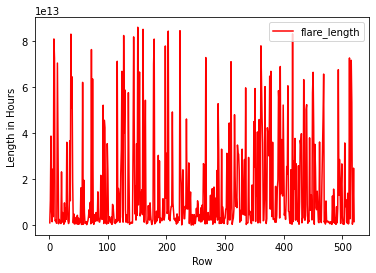

In [2642]:
# Creates the first plot using the nasa data
nasa_plot = nasaLen.plot(color="red")
nasa_plot.set_xlabel("Row")
nasa_plot.set_ylabel("Length in Hours")

Text(0, 0.5, 'Length in Hours')

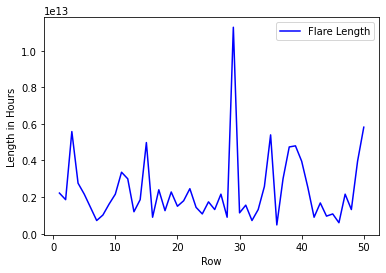

In [2644]:
# Creates the second plot using the Top 50 Solar Flares
solar_plot = solarLen.plot(color='blue')
solar_plot.set_xlabel("Row")
solar_plot.set_ylabel("Length in Hours")

I had intended to combine the two plots above into one plot with a single y-axis but different x-axes in an effort to compare the length of the solar flares from all the nasa data with the length of the solar flares from the Top 50. Unfortunately, I could not figure out how to do this. That being said, even without combining them, looking at them side by side shows that the Top 50 solar flares lasted far shorter. The max length for the Top 50 was just a bit over 1.3 hours. In contrast, some of the solar flares from the nasa data could were hitting 8 hours.

Just use your big smart human brain to combine the above two plots in your head.